In [1]:
import os,cv2
path = r'C:\\Users\hp\Desktop\letters recognition\images' 
dstpath = r'C:\\Users\hp\Desktop\letters recognition\Img2'

In [2]:
folders = os.listdir(path)
print(folders)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [3]:
for folder in folders:
    paths = path+"\\"+folder+"\\"
    files = os.listdir(path+"\\"+folder)
    for image in files:
        imgpath = path+"\\"+folder +'\\'+image
        img = cv2.imread(imgpath,cv2.IMREAD_GRAYSCALE)
        cv2.imwrite(dstpath+"\\"+folder +'\\'+image,img)

In [2]:
import pandas as pd 
import tensorflow as tf 
import cv2
import matplotlib.pyplot as plt
from skimage.transform import resize
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import glob
import skimage
from  PIL import Image
from tensorflow.keras.preprocessing import image as image_utils
from skimage import io
from skimage.transform import resize
import numpy as np

In [5]:
def read_images(path,name):
 images=[]
 labels=[]
 for image in glob.glob(path+'/'+name+'/*'):
   img = io.imread(image)
   img = np.asarray(img)
   img = skimage.transform.resize(img, (48, 48, 3))
   images.append(img)
   labels.append(name)
 return labels,images

In [6]:
labels_1,images_1=read_images(dstpath,'Y')

In [7]:
import numpy as np
images_1=np.array(images_1)
images_1.shape

(223, 48, 48, 3)

In [8]:
def visualize_images (images):
  plt.figure(figsize=(20,20))
  for i in range (27):
    plt.subplot(9,9,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(images[i])


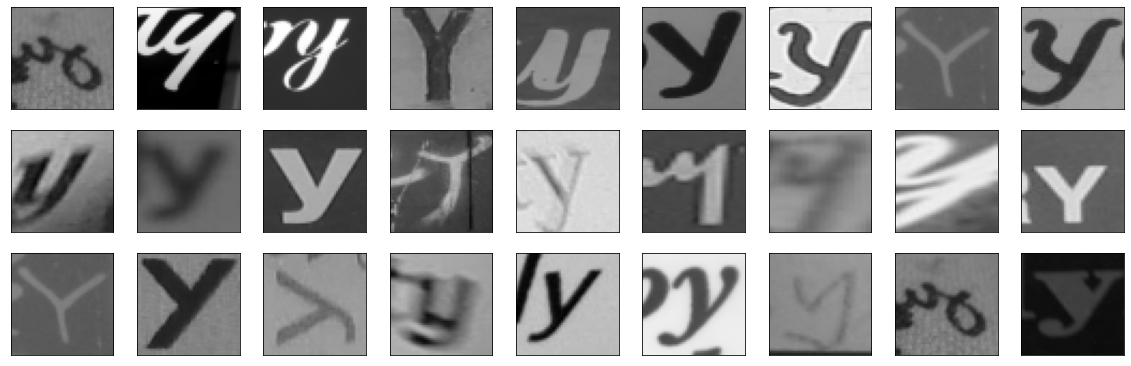

In [9]:
visualize_images(images_1)

In [10]:
labels={'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'H':7,'I':8,'J':9,'K':10,'L':11,'M':12,'N':13,'O':14,'P':15,'Q':16,'R':17,'S':18,'T':19,'U':20,'V':21,'W':22,'X':23,'Y':24,'Z':25,'0':26,'1':27,'2':28,'3':29,'4':30,'5':31,'6':32,'7':33,'8':34,'9':35}

def get_data(path):
  all_images=[]
  all_labels=[]
  for label in labels:
    labels_data,images=read_images(path,label)
    all_images+=images
    for image in  images :
      all_labels.append(labels[label])
  return all_images,all_labels
all_images,all_labels=get_data(dstpath)
np.shape(all_labels)

(15008,)

In [11]:
np.array(all_images).shape

(15008, 48, 48, 3)

In [12]:
y=np.array(all_labels)
y.shape

(15008,)

In [13]:
labels_lett = ['A',
 'B',
'C',
 'D',
'E',
 'F',
 'G',
 'H',
'I',
 'J',
 'K',
 'L',
 'M',
'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
'T',
 'U',
 'V',
 'W',
 'X',
'Y',
 'Z','0','1','2','3','4','5','6','7','8','9',]

In [14]:
def plot_histogram(): 
  y_int = np.int0(y)
  count = np.zeros(36, dtype='int')
  for i in y_int:
      count[i] +=1

  characters = []
  for label in labels:
      characters.append(label)

  fig, ax = plt.subplots(1,1, figsize=(10,10))
  ax.bar(characters, count)

  plt.xlabel("Caractère")
  plt.ylabel("Nombre d'éléments")
  plt.grid()
  plt.show()

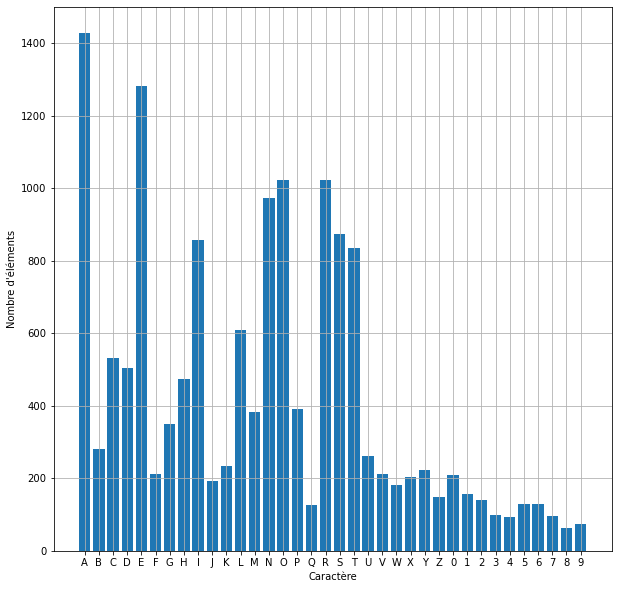

In [15]:
plot_histogram()

In [16]:
y=tf.keras.utils.to_categorical(y,36)

In [17]:
X=np.array(all_images)

In [18]:
X.shape

(15008, 48, 48, 3)

In [19]:
y.shape

(15008, 36)

In [20]:
from tensorflow import keras 
from tensorflow.keras import layers 
from keras.layers import Conv2D,Flatten,Dense,Dropout,Activation,MaxPooling2D, AveragePooling2D,GlobalAveragePooling2D
from keras.models import Sequential
from keras.layers import BatchNormalization
from keras.regularizers import l2

In [21]:
def create_model():
    model = Sequential()
    model.add(Conv2D(64,kernel_size=(3,3),kernel_regularizer=l2(0.0001),activation='relu',input_shape=(48,48,3)))
    model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
    model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Dropout(0.3))

    model.add(Conv2D(128,kernel_size=(3,3),kernel_regularizer=l2(0.0001),activation='relu'))
    model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Dropout(0.5))

    model.add(Conv2D(256,kernel_size=(3,3),kernel_regularizer=l2(0.0001),activation='relu'))
    model.add(Conv2D(256,kernel_size=(3,3),activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Dropout(0.5))

    model.add(Flatten())


    model.add(Dense(1024,kernel_regularizer=l2(0.001),activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(36,activation='softmax'))

    model.summary()
    return model

In [22]:
def compile_model(model):
  model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy']) 

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X,y, shuffle=True, test_size=0.15)

In [30]:
from tensorflow.keras.callbacks import ModelCheckpoint
def train_model(model):
    checkpoint = ModelCheckpoint("modelmajmin.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
    history = model.fit(X_train,y_train , epochs=300,  validation_split=0.2,batch_size=15, callbacks=[checkpoint])
    return history

In [31]:
model = create_model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        36928     
                                                                 
 conv2d_2 (Conv2D)           (None, 42, 42, 64)        36928     
                                                                 
 batch_normalization (BatchN  (None, 42, 42, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 21, 21, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 21, 21, 64)        0

In [32]:
compile_model(model)

In [33]:
history  = train_model(model)

Epoch 1/300
680/680 [==============================] - ETA: 0s - loss: 4.0567 - accuracy: 0.2714
Epoch 1: val_accuracy improved from -inf to 0.48215, saving model to modelmajmin.h5
680/680 [==============================] - 26s 22ms/step - loss: 4.0567 - accuracy: 0.2714 - val_loss: 2.9034 - val_accuracy: 0.4821
Epoch 2/300
678/680 [============================>.] - ETA: 0s - loss: 2.6963 - accuracy: 0.5156
Epoch 2: val_accuracy improved from 0.48215 to 0.60063, saving model to modelmajmin.h5
680/680 [==============================] - 13s 20ms/step - loss: 2.6961 - accuracy: 0.5155 - val_loss: 2.2822 - val_accuracy: 0.6006
Epoch 3/300
678/680 [============================>.] - ETA: 0s - loss: 2.2785 - accuracy: 0.5990
Epoch 3: val_accuracy improved from 0.60063 to 0.62613, saving model to modelmajmin.h5
680/680 [==============================] - 13s 19ms/step - loss: 2.2790 - accuracy: 0.5989 - val_loss: 2.2989 - val_accuracy: 0.6261
Epoch 4/300
679/680 [============================>.]

Epoch 57/300
678/680 [============================>.] - ETA: 0s - loss: 1.0980 - accuracy: 0.8885
Epoch 57: val_accuracy improved from 0.86975 to 0.87132, saving model to modelmajmin.h5
680/680 [==============================] - 14s 20ms/step - loss: 1.0985 - accuracy: 0.8883 - val_loss: 1.2526 - val_accuracy: 0.8713
Epoch 58/300
677/680 [============================>.] - ETA: 0s - loss: 1.0972 - accuracy: 0.8902
Epoch 58: val_accuracy did not improve from 0.87132
680/680 [==============================] - 13s 19ms/step - loss: 1.0973 - accuracy: 0.8902 - val_loss: 1.2902 - val_accuracy: 0.8521
Epoch 59/300
678/680 [============================>.] - ETA: 0s - loss: 1.0416 - accuracy: 0.9020
Epoch 59: val_accuracy did not improve from 0.87132
680/680 [==============================] - 13s 20ms/step - loss: 1.0416 - accuracy: 0.9021 - val_loss: 1.2420 - val_accuracy: 0.8639
Epoch 60/300
679/680 [============================>.] - ETA: 0s - loss: 1.0547 - accuracy: 0.8970
Epoch 60: val_acc

Epoch 86/300
679/680 [============================>.] - ETA: 0s - loss: 1.0175 - accuracy: 0.9050
Epoch 86: val_accuracy did not improve from 0.88545
680/680 [==============================] - 13s 20ms/step - loss: 1.0173 - accuracy: 0.9050 - val_loss: 1.2327 - val_accuracy: 0.8745
Epoch 87/300
679/680 [============================>.] - ETA: 0s - loss: 1.0282 - accuracy: 0.9066
Epoch 87: val_accuracy did not improve from 0.88545
680/680 [==============================] - 13s 20ms/step - loss: 1.0281 - accuracy: 0.9066 - val_loss: 1.1927 - val_accuracy: 0.8784
Epoch 88/300
678/680 [============================>.] - ETA: 0s - loss: 1.0112 - accuracy: 0.9089
Epoch 88: val_accuracy did not improve from 0.88545
680/680 [==============================] - 13s 19ms/step - loss: 1.0109 - accuracy: 0.9090 - val_loss: 1.1982 - val_accuracy: 0.8749
Epoch 89/300
678/680 [============================>.] - ETA: 0s - loss: 0.9919 - accuracy: 0.9129
Epoch 89: val_accuracy did not improve from 0.88545
6

Epoch 115/300
680/680 [==============================] - ETA: 0s - loss: 0.9702 - accuracy: 0.9167
Epoch 115: val_accuracy did not improve from 0.88545
680/680 [==============================] - 13s 19ms/step - loss: 0.9702 - accuracy: 0.9167 - val_loss: 1.1683 - val_accuracy: 0.8847
Epoch 116/300
680/680 [==============================] - ETA: 0s - loss: 0.9442 - accuracy: 0.9223
Epoch 116: val_accuracy did not improve from 0.88545
680/680 [==============================] - 13s 19ms/step - loss: 0.9442 - accuracy: 0.9223 - val_loss: 1.1791 - val_accuracy: 0.8745
Epoch 117/300
680/680 [==============================] - ETA: 0s - loss: 0.9521 - accuracy: 0.9190
Epoch 117: val_accuracy improved from 0.88545 to 0.89290, saving model to modelmajmin.h5
680/680 [==============================] - 13s 20ms/step - loss: 0.9521 - accuracy: 0.9190 - val_loss: 1.1502 - val_accuracy: 0.8929
Epoch 118/300
678/680 [============================>.] - ETA: 0s - loss: 0.9648 - accuracy: 0.9180
Epoch 118:

Epoch 144/300
680/680 [==============================] - ETA: 0s - loss: 0.9541 - accuracy: 0.9168
Epoch 144: val_accuracy did not improve from 0.89290
680/680 [==============================] - 13s 19ms/step - loss: 0.9541 - accuracy: 0.9168 - val_loss: 1.1801 - val_accuracy: 0.8745
Epoch 145/300
679/680 [============================>.] - ETA: 0s - loss: 0.9013 - accuracy: 0.9298
Epoch 145: val_accuracy did not improve from 0.89290
680/680 [==============================] - 13s 19ms/step - loss: 0.9016 - accuracy: 0.9297 - val_loss: 1.1602 - val_accuracy: 0.8819
Epoch 146/300
678/680 [============================>.] - ETA: 0s - loss: 0.9239 - accuracy: 0.9223
Epoch 146: val_accuracy did not improve from 0.89290
680/680 [==============================] - 13s 19ms/step - loss: 0.9240 - accuracy: 0.9224 - val_loss: 1.1769 - val_accuracy: 0.8835
Epoch 147/300
679/680 [============================>.] - ETA: 0s - loss: 0.9229 - accuracy: 0.9241
Epoch 147: val_accuracy did not improve from 0

Epoch 173/300
678/680 [============================>.] - ETA: 0s - loss: 0.8703 - accuracy: 0.9316
Epoch 173: val_accuracy did not improve from 0.89290
680/680 [==============================] - 13s 19ms/step - loss: 0.8700 - accuracy: 0.9316 - val_loss: 1.1180 - val_accuracy: 0.8890
Epoch 174/300
680/680 [==============================] - ETA: 0s - loss: 0.8640 - accuracy: 0.9338
Epoch 174: val_accuracy did not improve from 0.89290
680/680 [==============================] - 13s 19ms/step - loss: 0.8640 - accuracy: 0.9338 - val_loss: 1.1075 - val_accuracy: 0.8807
Epoch 175/300
678/680 [============================>.] - ETA: 0s - loss: 0.8753 - accuracy: 0.9305
Epoch 175: val_accuracy did not improve from 0.89290
680/680 [==============================] - 13s 19ms/step - loss: 0.8755 - accuracy: 0.9304 - val_loss: 1.1688 - val_accuracy: 0.8835
Epoch 176/300
678/680 [============================>.] - ETA: 0s - loss: 0.8895 - accuracy: 0.9290
Epoch 176: val_accuracy did not improve from 0

Epoch 202/300
677/680 [============================>.] - ETA: 0s - loss: 0.8570 - accuracy: 0.9324
Epoch 202: val_accuracy improved from 0.89290 to 0.89643, saving model to modelmajmin.h5
680/680 [==============================] - 13s 20ms/step - loss: 0.8566 - accuracy: 0.9326 - val_loss: 1.1220 - val_accuracy: 0.8964
Epoch 203/300
680/680 [==============================] - ETA: 0s - loss: 0.8298 - accuracy: 0.9388
Epoch 203: val_accuracy did not improve from 0.89643
680/680 [==============================] - 13s 19ms/step - loss: 0.8298 - accuracy: 0.9388 - val_loss: 1.1124 - val_accuracy: 0.8866
Epoch 204/300
680/680 [==============================] - ETA: 0s - loss: 0.8648 - accuracy: 0.9306
Epoch 204: val_accuracy did not improve from 0.89643
680/680 [==============================] - 13s 19ms/step - loss: 0.8648 - accuracy: 0.9306 - val_loss: 1.1390 - val_accuracy: 0.8878
Epoch 205/300
679/680 [============================>.] - ETA: 0s - loss: 0.8787 - accuracy: 0.9287
Epoch 205:

Epoch 231/300
678/680 [============================>.] - ETA: 0s - loss: 0.8458 - accuracy: 0.9333
Epoch 231: val_accuracy did not improve from 0.89643
680/680 [==============================] - 13s 19ms/step - loss: 0.8460 - accuracy: 0.9334 - val_loss: 1.1466 - val_accuracy: 0.8847
Epoch 232/300
678/680 [============================>.] - ETA: 0s - loss: 0.8556 - accuracy: 0.9349
Epoch 232: val_accuracy did not improve from 0.89643
680/680 [==============================] - 13s 19ms/step - loss: 0.8553 - accuracy: 0.9351 - val_loss: 1.1512 - val_accuracy: 0.8882
Epoch 233/300
678/680 [============================>.] - ETA: 0s - loss: 0.8267 - accuracy: 0.9389
Epoch 233: val_accuracy did not improve from 0.89643
680/680 [==============================] - 13s 19ms/step - loss: 0.8265 - accuracy: 0.9390 - val_loss: 1.1264 - val_accuracy: 0.8851
Epoch 234/300
679/680 [============================>.] - ETA: 0s - loss: 0.8309 - accuracy: 0.9376
Epoch 234: val_accuracy did not improve from 0

Epoch 260/300
678/680 [============================>.] - ETA: 0s - loss: 0.8492 - accuracy: 0.9363
Epoch 260: val_accuracy did not improve from 0.89682
680/680 [==============================] - 13s 19ms/step - loss: 0.8489 - accuracy: 0.9363 - val_loss: 1.1391 - val_accuracy: 0.8815
Epoch 261/300
677/680 [============================>.] - ETA: 0s - loss: 0.8402 - accuracy: 0.9387
Epoch 261: val_accuracy did not improve from 0.89682
680/680 [==============================] - 13s 19ms/step - loss: 0.8411 - accuracy: 0.9385 - val_loss: 1.1240 - val_accuracy: 0.8917
Epoch 262/300
679/680 [============================>.] - ETA: 0s - loss: 0.8072 - accuracy: 0.9427
Epoch 262: val_accuracy did not improve from 0.89682
680/680 [==============================] - 13s 19ms/step - loss: 0.8071 - accuracy: 0.9427 - val_loss: 1.0990 - val_accuracy: 0.8847
Epoch 263/300
680/680 [==============================] - ETA: 0s - loss: 0.8085 - accuracy: 0.9410
Epoch 263: val_accuracy did not improve from 0

Epoch 289/300
678/680 [============================>.] - ETA: 0s - loss: 0.8266 - accuracy: 0.9364
Epoch 289: val_accuracy did not improve from 0.89682
680/680 [==============================] - 13s 20ms/step - loss: 0.8274 - accuracy: 0.9362 - val_loss: 1.1226 - val_accuracy: 0.8909
Epoch 290/300
678/680 [============================>.] - ETA: 0s - loss: 0.8144 - accuracy: 0.9429
Epoch 290: val_accuracy did not improve from 0.89682
680/680 [==============================] - 13s 20ms/step - loss: 0.8141 - accuracy: 0.9430 - val_loss: 1.0995 - val_accuracy: 0.8925
Epoch 291/300
679/680 [============================>.] - ETA: 0s - loss: 0.8173 - accuracy: 0.9415
Epoch 291: val_accuracy did not improve from 0.89682
680/680 [==============================] - 13s 20ms/step - loss: 0.8172 - accuracy: 0.9415 - val_loss: 1.0877 - val_accuracy: 0.8921
Epoch 292/300
679/680 [============================>.] - ETA: 0s - loss: 0.8196 - accuracy: 0.9406
Epoch 292: val_accuracy did not improve from 0

In [34]:
model_json = model.to_json()
with open("modelmajmin.json","w") as json_file:
    json_file.write(model_json)

In [35]:
def evaluation(history):
    plt.figure(figsize=(15,10))
    plt.subplot(1, 2, 1)
    plt.suptitle('Optimizer : Adam', fontsize=10)
    plt.ylabel('Loss', fontsize=16)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend(loc='upper right')

    plt.subplot(1, 2, 2)
    plt.ylabel('Accuracy', fontsize=16)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.show()

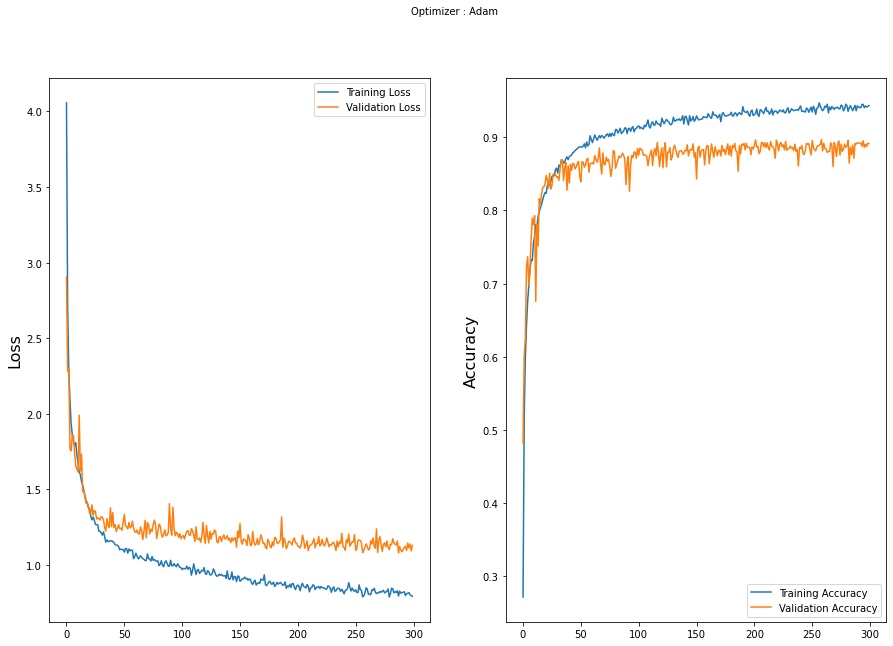

In [36]:
evaluation(history)

In [37]:
print(np.array(history.history["val_accuracy"]).mean())

0.8678109056750933


In [38]:
pred = model.predict(X_valid)
label_pred=np.argmax(pred,axis=1)

71/71 [==============================] - 2s 12ms/step


In [39]:
def transform_output(output):
  newOutput = []
  list_of_key = list(labels.keys())
  list_of_value = list(labels.values()) 
  for i in output :
    position = list_of_value.index(i)
    newOutput.append(list_of_key[position])
  return newOutput

In [40]:
label_pred = transform_output(label_pred)

In [41]:
y_validd=np.argmax(y_valid,axis=1)

In [42]:
from sklearn.metrics import confusion_matrix
y_validd = transform_output(y_validd)
matrix = confusion_matrix(y_true=y_validd, y_pred=label_pred)
print(matrix)

[[16  0  0 ...  0  0  0]
 [ 0 15  0 ...  0  0  0]
 [ 0  0 20 ...  0  0  1]
 ...
 [ 0  0  1 ... 30  1  0]
 [ 0  0  0 ...  1 27  0]
 [ 0  0  0 ...  0  0 22]]


In [32]:
labels_lett = ['A',
 'B',
'C',
 'D',
'E',
 'F',
 'G',
 'H',
'I',
 'J',
 'K',
 'L',
 'M',
'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
'T',
 'U',
 'V',
 'W',
 'X',
'Y',
 'Z','0','1','2','3','4','5','6','7','8','9',]

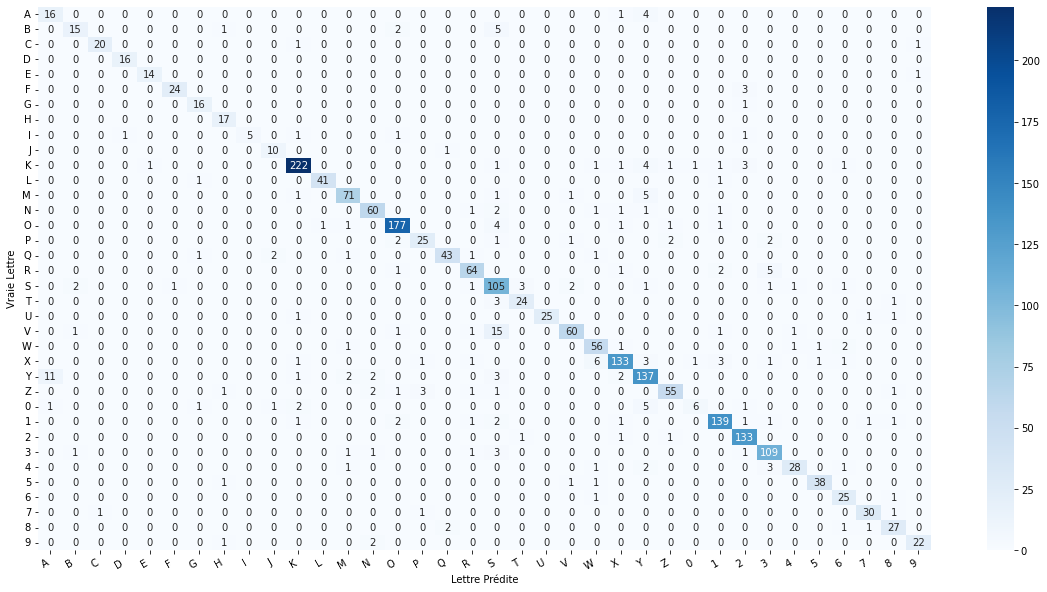

In [44]:
from sklearn import metrics
import seaborn as sns
def show_confusion_matrix(confusion_matrix):
  plt.figure(figsize=(20,10))
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
  plt.ylabel('Vraie Lettre')
  plt.xlabel('Lettre Prédite');
df_cm = pd.DataFrame(matrix, index=labels_lett, columns=labels_lett)
show_confusion_matrix(df_cm)

In [3]:
labels={'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'H':7,'I':8,'J':9,'K':10,'L':11,'M':12,'N':13,'O':14,'P':15,'Q':16,'R':17,'S':18,'T':19,'U':20,'V':21,'W':22,'X':23,'Y':24,'Z':25,'0':26,'1':27,'2':28,'3':29,'4':30,'5':31,'6':32,'7':33,'8':34,'9':35}


In [4]:
dict = {v: k for k, v in labels.items()}
dict

{0: 'A',
 1: 'B',
 2: 'C',
 3: 'D',
 4: 'E',
 5: 'F',
 6: 'G',
 7: 'H',
 8: 'I',
 9: 'J',
 10: 'K',
 11: 'L',
 12: 'M',
 13: 'N',
 14: 'O',
 15: 'P',
 16: 'Q',
 17: 'R',
 18: 'S',
 19: 'T',
 20: 'U',
 21: 'V',
 22: 'W',
 23: 'X',
 24: 'Y',
 25: 'Z',
 26: '0',
 27: '1',
 28: '2',
 29: '3',
 30: '4',
 31: '5',
 32: '6',
 33: '7',
 34: '8',
 35: '9'}

In [12]:
from keras.models import model_from_json

json_file = open('modelmajmin.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
recog_model = model_from_json(loaded_model_json)

# load weights into new model
recog_model.load_weights("modelmajmin.h5")
print("Loaded model from disk")
# recog_model.summary()

Loaded model from disk


In [16]:
def show_image(img_path):
    image=io.imread(img_path)
    plt.subplot(1, 1, 1)
    plt.axis('off')
    plt.imshow(image)
    return image

In [17]:
from skimage import io
from skimage.transform import resize
def predict (image):    
    image_to_predict = np.asarray(image)
    img = skimage.transform.resize(image_to_predict, (48, 48, 3))
    tab = []
    tab.append(img)
    tab = np.array(tab)
    print('Le caractère prédit est : '+dict[np.argmax(recog_model.predict(tab))])

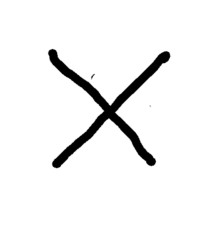

In [21]:
image = show_image("./x.png")

In [22]:
predict(image)

1/1 [==============================] - 0s 21ms/step
Le caractère prédit est : X
